In [11]:
import  numpy as np
import pandas as pd
from sklearn import (datasets, neighbors,model_selection as ms,linear_model, metrics)
diabetes = datasets.load_diabetes()
tts = ms.train_test_split(diabetes.data,
diabetes.target,
test_size=.25)
(diabetes_train, diabetes_test,
diabetes_train_tgt, diabetes_test_tgt) = tts
models = {'kNN': neighbors.KNeighborsRegressor(n_neighbors=3),
          'linreg' : linear_model.LinearRegression()
          }
for name, model in models.items():
        fit = model.fit(diabetes_train, diabetes_train_tgt)
        preds = fit.predict(diabetes_test)
        score = np.sqrt(metrics.mean_squared_error(diabetes_test_tgt, preds))
print("{:>6s} : {:0.2f}".format(name,score))

linreg : 55.03


In [14]:
N = 20
feature = np.linspace(-10, 10, num=N)
# ftr values
target = 2*feature**2 - 3 + np.random.uniform(-2, 2, N) # tgt = func(ftr)
(train_ftr, test_ftr,
train_tgt, test_tgt) = ms.train_test_split(feature, target, test_size=N//2)
display(pd.DataFrame({"ftr":train_ftr,
"tgt":train_tgt}).T)


,0,1,2,3,4,5,6,7,8,9
ftr,3.684211,7.894737,-0.526316,-8.947368,-3.684211,-6.842105,-4.736842,8.947368,10.000000,-5.789474
tgt,24.773995,119.927637,-2.631735,157.718633,25.674658,91.937855,41.835636,156.511562,196.570654,65.169096


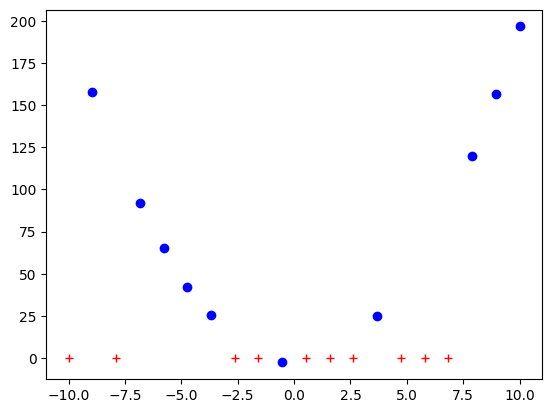

In [15]:
import matplotlib.pyplot as plt
plt.plot(train_ftr, train_tgt, 'bo')
plt.plot(test_ftr,np.zeros_like(test_ftr), 'r+');

ValueError: All arrays must be of the same length

In [ ]:
#THE MSE(mean squared error works in this way : it finds the diff between the predicted and the actual value , squares them and then finds their mean)